==============================================================================================
# Practicum 5 - Part 1

==============================================================================================

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Add title to the figures to explain what is displayed.

- Comments need to be in **english**.

- The deliverable must be a file named **P5_Student1_Student2.zip** that includes:
    - The notebook P5_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.

**Deadline (Group A- Group F): November 23th, 23:00 h**

**Deadline (Group B): November 24th, 23:00 h**

==============================================================================================
##  Image search using textures
==============================================================================================

#### Problem we want to solve
- Given a query image **$x$** and a set of images **$X$** we would like to retreive the most similar to **$x$** images from  **$X$**.

The exercises of this notebook will show how we can perform image similarity search using:

**Part 1:**

- Gaussian filters
- Descriptors based on texture 

**Part 2:**

- Distance between images and similarity search


### Imports

In [29]:
%matplotlib inline

import time
import scipy
import numpy as np
import skimage
from skimage import filters
from skimage.io import imread
from skimage.color import rgb2gray, rgba2rgb
from skimage.transform import resize
from scipy.ndimage import convolve

import pickle


import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [31]:
def visualize2(tigre_f,tigre_x,label1,label2):
    #visualize
    fig=plt.figure(figsize=(15,15))
    fig.add_subplot(1,2,1)
    plt.title(label1)
    plt.imshow(tigre_f, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    fig.add_subplot(1,2,2)
    plt.title(label2)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tigre_x, cmap='gray')
    
def normalize(image): return (image[:,:]- image.min())/(image.max() - image.min())

    
def visualize_n(image_list):

    fig=plt.figure(figsize=(15,15))
    for i in range(len(image_list)):
        
        fig.add_subplot(1,len(image_list),i +1)
        plt.imshow(image_list[i], cmap='gray')
        plt.xticks([])
        plt.yticks([])

def normalize(image): return (image[:,:]- image.min())/(image.max() - image.min())

# 1 Leung-Malik (LM) Filter Bank
We can apply a collection of multiple filters that we call a filter bank. Note that if we apply $D$ filters our feature vectors will be $D$ dimensional.

The following image shows a filter bank. In the filter bank we typically want filters to capture a combination of scales, orientations of different types of patterns. This particular filter bank is The Leung-Malik (LM) Filter Bank.

<img src="./images_notebook/filter_bank.png">


We import Leung-Malik filters as follows:

In [36]:
import LM_filters
filter_bank = LM_filters.makeLMfilters()

**1.1** Check what the makeLMfilters reurn and plot all the filters using ``plt.subplots()``

**Hint:** In order to perform a correct visualization, please, check how many filters are in the filter bank.

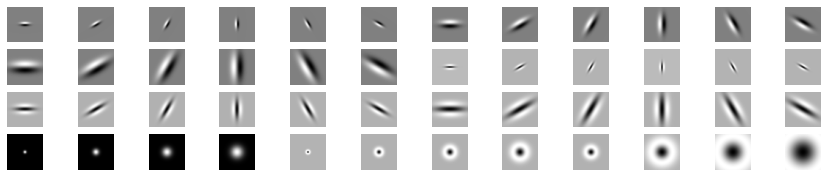

In [37]:
n_filters = filter_bank.shape[-1]

fig, ax = plt.subplots(ncols=12, nrows=4, figsize=(15,3))

k = 0
for i in range(4):
    for j in range(12):
        ax[i,j].imshow(filter_bank[:,:,k], cmap = 'gray')
        ax[i,j].axis("off")
        k = k + 1


Which is the size of the filters? How many filters there are?

In [38]:
print("Filters shape:\t", filter_bank[:,:,0].shape)
print("Num filters:\t", n_filters)

Filters shape:	 (49, 49)
Num filters:	 48


## Visualize Features

**1.2** Read the image ``/images/pizza.jpg``, and resize it to 250𝑥250 pixels. Then, convert the image to grayscale and visualize both, the RGB and the grayscale images.

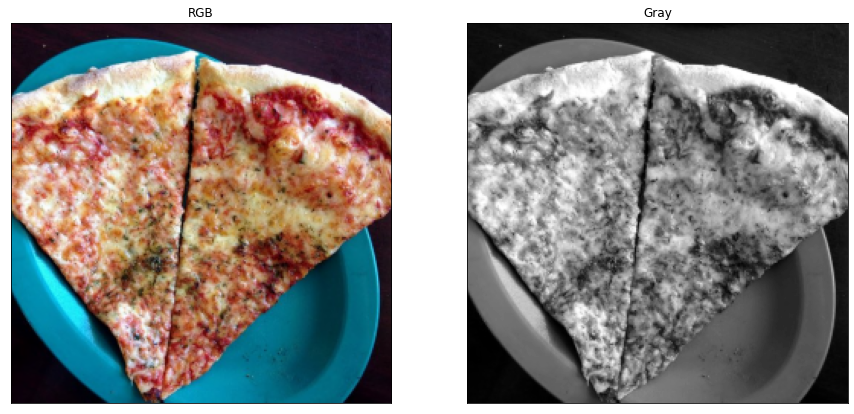

In [40]:
pizza = imread("images/pizza.jpg")
pizza = resize(pizza, (250, 250))
pizza_gr = rgb2gray(pizza)

visualize2(pizza, pizza_gr, "RGB", "Gray")

**1.3** Make a function `visualize_filters(im,  filter_bank, n_filters=5)` that recieves the `filter_bank`, an image `im` and an integer `n_filters`. 

The function  must make a plot of two rows containing in the first row, in position $k$, the image convolved by filter $k$. In the second row, in position $k$, the image of the k'th filter. The result for `n_filter=5` should look like 


<img src="./images/filters.png" >

**Hint**: Note that since at this moment we are focusing on the texture, we will not use the color of the images.

In [41]:
bank = [filter_bank[:,:,i] for i in range(0,len(filter_bank)-1)]

In [45]:
def apply_filters(im,  filters):
    return np.array([np.abs(convolve(im, f)) for f in filters])
    
def visualize_filters(im,  filter_bank, n_filters=5):
    filters = filter_bank[0:n_filters]
    images = apply_filters(im, filters)
    visualize_n(images)
    visualize_n(filters)

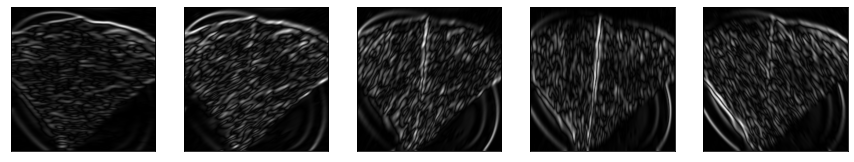

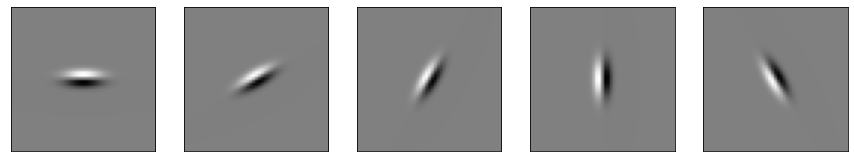

In [46]:
visualize_filters(pizza_gr, bank)

**1.4** (Optional) Try ``visualize_filters()`` using a different number of filters and using another image (for instance ``/images/dog.jpg`` or ``/images/flower.jpg``)

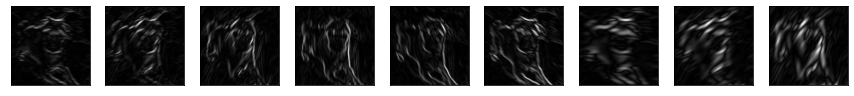

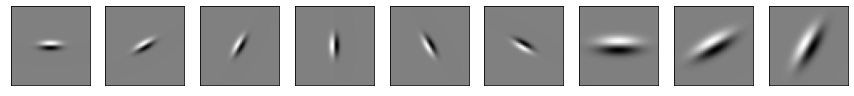

In [48]:
dog = imread("images/dog.jpg")
dog = resize(dog, (250, 250))
dog_gr = rgb2gray(dog)

visualize_filters(dog_gr, bank, n_filters=9)


### Extracting a feature vector for an image

**1.5** Given $D$ filters from the filter bank and a single image `image`, make a function `extract_features(image, filter_bank, n_filters)` that returns a feature vector of shape `n_filters`. The returned vector must contain at position $k$ the mean of the absolute value of the convolved image by filter $k$.

$$
\text{feat}(x) = \left( \text{mean}( |r_1|), \dots,\text{mean}(|r_D|) \right)
$$

Try the function with the previous image and print the feature vector.

**Hint**: The function should return a feature vector obtained by averaging each filter response on the image.  




In [49]:
def extract_features(image, filter_bank, n_filters):
    
    filters = bank[0:n_filters]
    
    filtered_images = apply_filters(image, filters)  
    
    return np.array([np.mean(np.abs(f_image.flatten())) for f_image in filtered_images])

In [50]:
## Try the function
n_filters = 5
features = extract_features(pizza_gr, bank, n_filters)
features

array([0.01579451, 0.0143445 , 0.01413914, 0.01579027, 0.01707894])


**2.2** (Optional) Try ``extract_features()`` using a different number of filters and other images (for instance ``/images/dog.jpg`` or ``/images/flower.jpg``)


In [51]:
n_filters = 9
features = extract_features(dog_gr, bank, n_filters)
features

array([0.00661994, 0.00651979, 0.00757997, 0.00877453, 0.00857683,
       0.00760265, 0.00464912, 0.00465771, 0.0052676 ])

## 2 Load & resize the dataset

**2.1** Read all the images in the directories, resized them to 250x250 pixels and save the image in an array:

<ul>
    <li>./images/pizza/</li>
    <li>./images/flowers/</li>
    <li>./images/pets/</li>
</ul>

**Hint:** You have to create an array for each directory, which containts all the images belonging to that path.

**Hint:** You need to use ``os.listdir()`` to list all the images for each directory.

In [52]:
pizza_images = [resize(imread("images/pizza/" + image), (250, 250)) for image in os.listdir("images/pizza/")]
flowers_images = [resize(imread("images/flowers/" + image), (250, 250)) for image in os.listdir("images/flowers/")]
pets_images = [resize(imread("images/pets/" + image), (250, 250)) for image in os.listdir("images/pets/")]

Visualize one image (the first) from each array. Use ``subplot`` to create a 3x1figure.

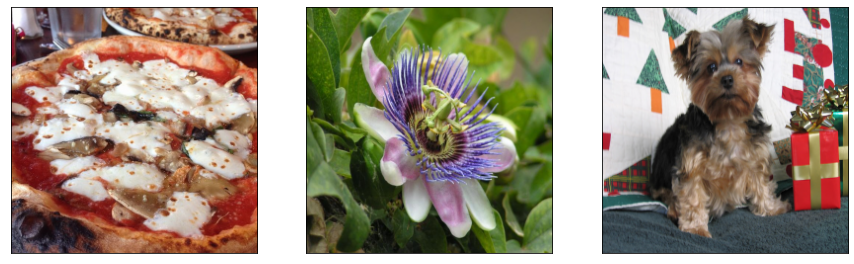

In [53]:
visualize_n([
    pizza_images[0],
    flowers_images[0],
    pets_images[0]
])

How many images there are in each directory?

In [54]:
print("Pizza:\t" , len(pizza_images))
print("Flowers:" , len(flowers_images))
print("Pets:\t" , len(pets_images))

Pizza:	 30
Flowers: 29
Pets:	 29


### Constructing the matrix of the feature vectors for all images

**2.2** Implement a function `get_dataset_features(all_images, filter_bank)` that applies `extract_features` to get a feature vector for each of the images in the union of the three datasets (fish and chips_images, pizza, paella). It must return a matrix containing at row $k$ feature vector for the input image $k$.

Try the function with the whole data set:

*all_images = pizza_images + flowers_images + pets_images*

In [55]:
from tqdm import tqdm_notebook

def get_dataset_features(all_images, bank):
    n_filters = len(bank)
    
    result = [extract_features(image, bank, n_filters) for image in tqdm_notebook(all_images)]
    
    return np.array(result)

In [56]:
all_images = flowers_images + pets_images + pizza_images
all_images_gr = [rgb2gray(image) for image in all_images]

try:
    with open('feature_vector2.pkl', 'rb') as fp:
        feature_vectors = pickle.load(fp)
except:
    print("Calculate feature vector")
    feature_vectors=get_dataset_features(all_images_gr, bank)
    with open('feature_vector2.pkl', 'wb') as fp:
        pickle.dump(feature_vectors, fp, pickle.HIGHEST_PROTOCOL)

**2.3** Print the shape of `feature_vectors` as well as the features for image #0 (*i.e. all_images[0]*), image #30, and image #59, directly from the vector

In [57]:
print(feature_vectors.shape)

(88, 48)


In [58]:
print(feature_vectors[0])
print(feature_vectors[30])
print(feature_vectors[59])

[1.23938681e-02 1.27508929e-02 1.34795152e-02 1.42418623e-02
 1.39637649e-02 1.30757875e-02 8.65718505e-03 8.82405512e-03
 9.34874181e-03 9.96944352e-03 9.92402097e-03 9.38021665e-03
 6.56814871e-03 6.64758322e-03 7.17119619e-03 7.57230514e-03
 7.69639923e-03 7.21700823e-03 4.51461994e-03 4.63341031e-03
 5.00354719e-03 5.46663323e-03 5.24143704e-03 4.84392749e-03
 1.78187670e-03 1.77403395e-03 1.88803769e-03 2.13185214e-03
 2.04847801e-03 1.97482134e-03 1.02649914e-03 1.05110443e-03
 1.10726806e-03 1.20465498e-03 1.20271465e-03 1.15456942e-03
 1.49975754e+00 2.99951509e+00 4.49927257e+00 5.99885660e+00
 7.49878772e-01 3.74939386e-01 2.49959464e-01 1.87357026e-01
 2.49959464e-01 1.15165162e-01 3.65814337e-02 3.71682917e-03]
[9.43223433e-03 9.84999058e-03 1.14004292e-02 1.23450909e-02
 1.12815428e-02 9.89640678e-03 6.01394473e-03 5.98877715e-03
 7.13817483e-03 7.76146676e-03 7.20306924e-03 6.29777573e-03
 4.29416755e-03 4.30447037e-03 5.31048878e-03 5.67156344e-03
 5.29929864e-03 4.58373

### Visualizing the features of an image

**2.4** Define a function `visualize_features` that given three different images, plots their features. Use different colors (red, green, and blue) to distinguish the features of each image.
Choose 3 images on your choice and visualize the results.

In [59]:
"""
Im_index has len 3 by definition
    if its less function will return
    if more only 3 first images will be analized
"""
def visualize_features(im_index, feature_vector):
    
    if len(im_index) > 3: im_index = im_index[:3]
    elif len(im_index) < 3: return
    
    features1 =  feature_vector[im_index[0]]
    features2 =  feature_vector[im_index[1]]
    features3 =  feature_vector[im_index[2]]

    ind = np.arange(len(feature_vector[0]))

    fig = plt.figure(figsize=(18,8))
    fe1 = plt.bar( ind, features1,0.2, color='y')
    fe2 = plt.bar( ind+.2, features2, 0.2, color='r')
    fe3 = plt.bar( ind+.4, features3,0.2, color='g')
    plt.legend(
        (fe1[0], fe2[0], fe3[0]), 
        ('Image '+str(im_index[0]),'Image '+str(im_index[1]),'Image '+str(im_index[2])), 
        loc=2, prop={'size': 20})
    plt.show()

   

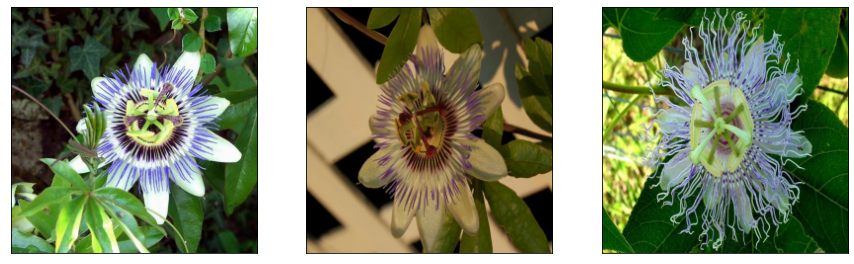

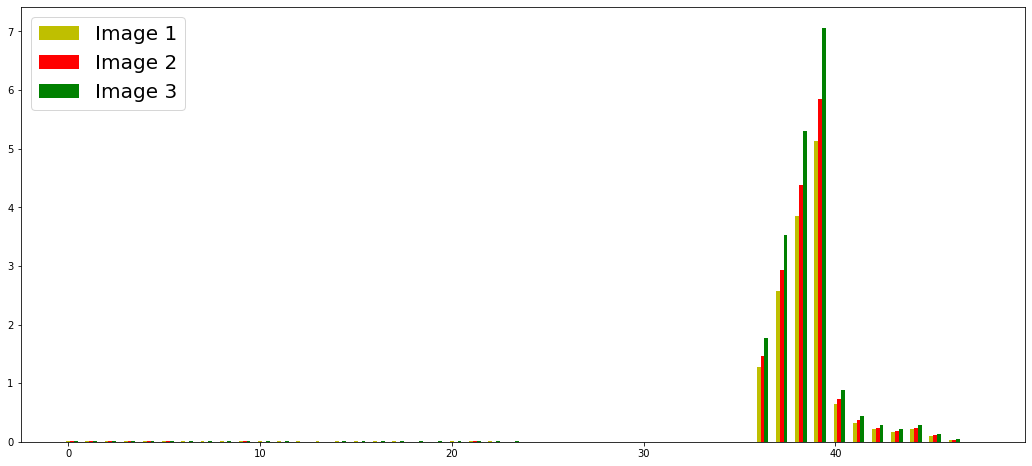

In [60]:
## Try the function
visualize_n(all_images[1:4])
visualize_features([1,2,3] , feature_vectors)

**2.5** (Optional) Try the function using a different set of images

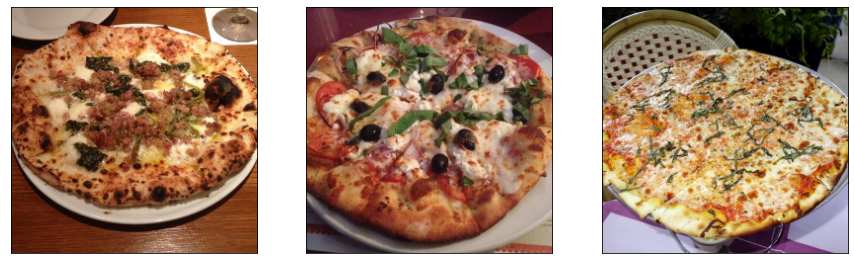

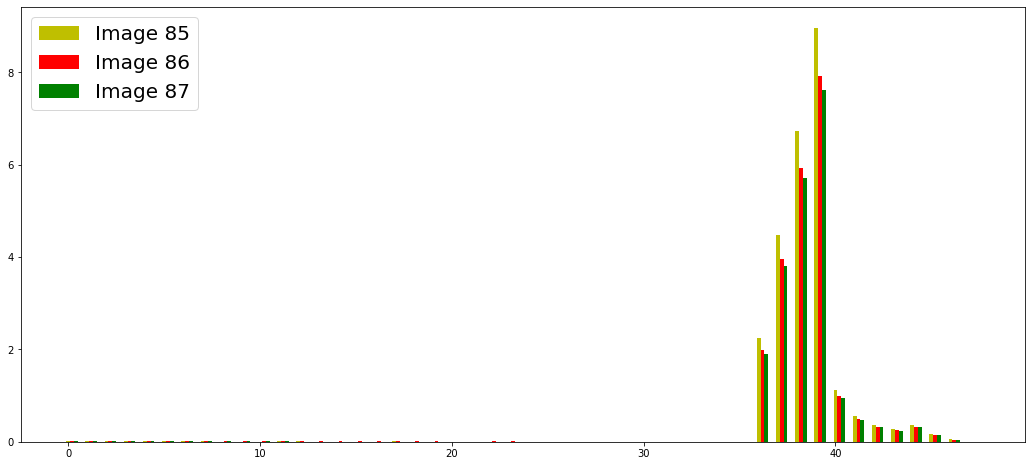

In [61]:
visualize_n(all_images[85:88])
visualize_features([85,86,87] , feature_vectors)

Explain which features are most important to a given image and with each derivatives are related.

The most important features for observed images are form 36 to 40:

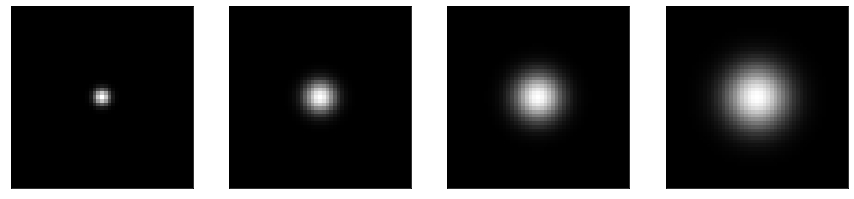

In [63]:
visualize_n(bank[36:40])

This filters correspond to the derivative of a gaussian. They are used to detect spots.

### Similarity search

Let us assume $f(x) \in \mathbb{R}^D$ represents a set of features for $x$. Given a query image $x$ and another image $x^m$ from the database, we can compute the distance between images as
$$
\text{distance}\left( f(x) , \, f(x^m) \right) = \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 =  \sqrt{ \sum_{d=1}^\text{D} \left( f(x)_d - f(x^m)_d  \right)^2 }
$$

then we can find the closest image $x^{m^*}$ from the database to $x$ as $m^* =  \text{argmin}_{m} \{ \| \text{feat}(x)  - \text{feat}(x^m)  \|_2 \}$



**2.5** Extract the image features using ``pizza.jpg`` and look for the most similar image in the whole dataset by comparing its features with those extracted from ``all_images``. What index was found in ``feature_vectors``?

Show the two images.


0.00039673333217483345


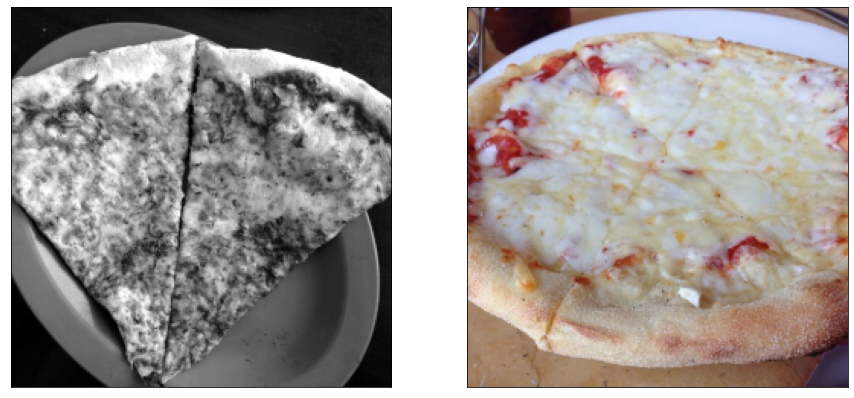

In [64]:
pizza = resize(rgb2gray(imread("images/pizza.jpg")), (250,250))
image_feature = extract_features(pizza_gr, bank, len(bank))

dists = [np.linalg.norm((feature - image_feature)) for feature in feature_vectors]
closest = list(zip(range(len(dists)), dists))
closest.sort(key=lambda x:x[1])

visualize_n([
    pizza_gr,
    all_images[closest[0][0]]
])

print(closest[0][1])

**2.6** (Optional) Repeat the process using ``/images/dog.jpg`` and ``/images/flower.jpg``

0.00023831574359230075


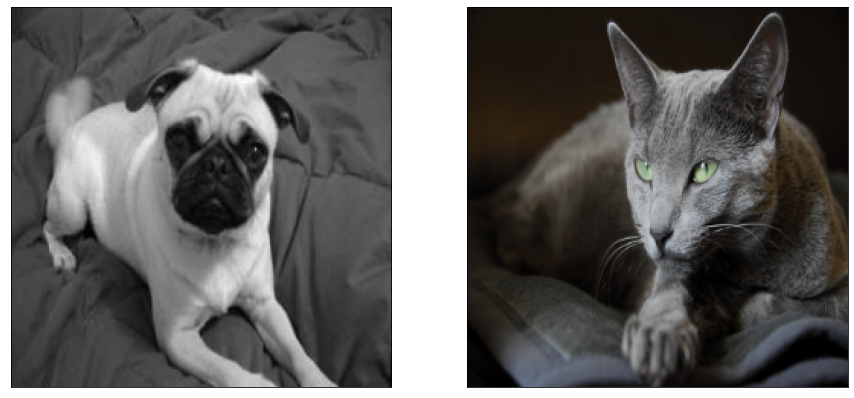

In [65]:
dog = rgb2gray(resize(imread("images/dog.jpg"), (250,250)))

image_feature = extract_features(dog, bank, len(bank))

dists = [np.linalg.norm((feature - image_feature)) for feature in feature_vectors]
closest = list(zip(range(len(dists)), dists))
closest.sort(key=lambda x:x[1])


visualize_n([
    dog,
    all_images[closest[0][0]]
])

print(closest[0][1])

0.0002501241964984866


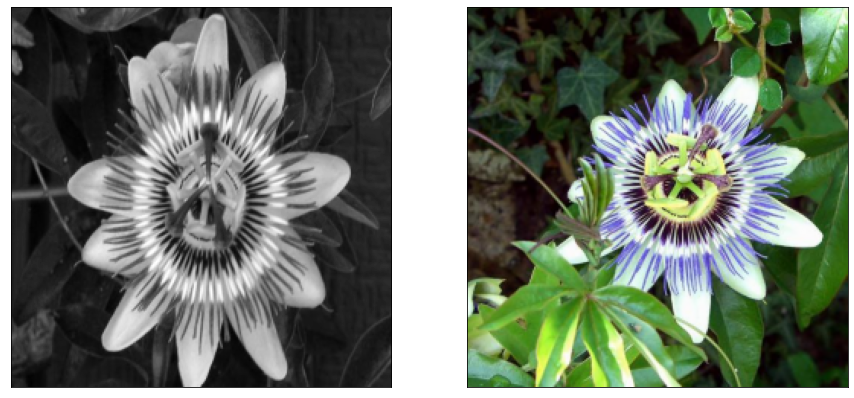

In [66]:
flower = rgb2gray(resize(imread("images/flower.jpg"), (250, 250)))

image_feature = extract_features(flower, filter_bank, len(bank))

dists = [np.linalg.norm((feature - image_feature)) for feature in feature_vectors]
closest = list(zip(range(len(dists)), dists))
closest.sort(key=lambda x:x[1])

visualize_n([
    flower,
    all_images[closest[0][0]]
])
print(closest[0][1])